<a href="https://colab.research.google.com/github/NovgorodovLeonid222634/222634-1/blob/main/%D0%9C%D0%9E1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Данные загружены.

2. Вывод описательной характеристики.
 
                  №      № школы  Номер варианта  Первичный балл         Балл  \
count  2356.000000  2356.000000     2356.000000     2356.000000  2356.000000   
mean   1178.500000   132.005518      338.273769       10.123939    49.255093   
std     680.262939     5.037984       53.660878        3.820484    17.880420   
min       1.000000   121.000000      101.000000        1.000000     5.000000   
25%     589.750000   127.000000      339.000000        7.000000    33.000000   
50%    1178.500000   135.000000      342.500000       10.000000    50.000000   
75%    1767.250000   136.000000      346.000000       13.000000    68.000000   
max    2356.000000   137.000000      506.000000       27.000000    96.000000   

       Минимальный балл  
count            2356.0  
mean               27.0  
std                 0.0  
min                27.0  
25%                27.0  
50%                27.0  
75%                27.0  
max     

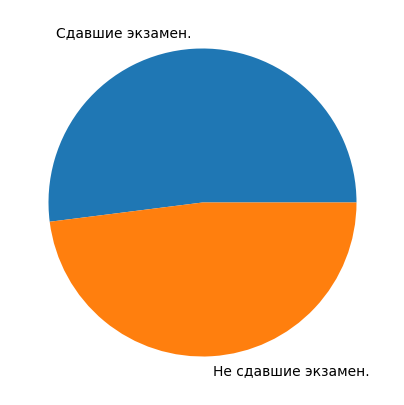

6. Ядерная оценка плотности распределения баллов за экзамен



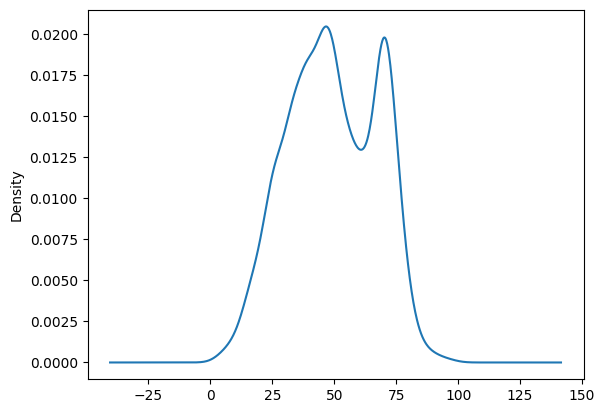



7а. Процент учащихся, выполнивших работу «отлично»:  5.73
7б. Процент учащихся, выполнивших работу «хорошо»:  46.26
7в. Процент учащихся, выполнивших работу «удовлетворительно»:  38.79
7г. Процент учащихся, выполнивших работу «неудовлетворительно»:  9.21 

8а. Процент юношей от общего количества учащихся:  47.0
8б. Процент девушек от общего количества учащихся:  53.0 

9. Количество школ, принимавшее участие в экзамене:  17 

10а. Заданий с кратким ответом:  12
10б. Заданий с развёрнутым ответом:  7 

11. Процент учеников, которые ответили на 1 задание с кратким ответом
верно:  89.0 
неверно:  11.0
11. Процент учеников, которые ответили на 2 задание с кратким ответом
верно:  95.0 
неверно:  5.0
11. Процент учеников, которые ответили на 3 задание с кратким ответом
верно:  93.0 
неверно:  7.0
11. Процент учеников, которые ответили на 4 задание с кратким ответом
верно:  91.0 
неверно:  9.0
11. Процент учеников, которые ответили на 5 задание с кратким ответом
верно:  88.0 
неверно:  12.0

In [128]:
import pandas as pd
import numpy as np
import textwrap
import matplotlib.pyplot as plt


df = pd.read_excel('Вариант 2.xlsx',skiprows=2)
df = df.dropna(subset=["№ школы"])
print("1. Данные загружены.\n")
print("2. Вывод описательной характеристики.\n","\n",df.describe())
net=df[df.Балл < df.Балл.mean()].shape[0]/df["Балл"].count()*100
da=100-net
print("3. Процент учащихся, выполнивших работу ниже среднего: ",net,"\n")
print("4, Процент учащихся не сдавших экзамен: ",df[df["Балл"] < df["Минимальный балл"]].shape[0]/df["Балл"].count()*100,"\n")
fig = plt.figure(figsize=(5, 5))
plt.pie([da,net],labels=["Сдавшие экзамен.","Не сдавшие экзамен."])
print("5. Круговая диаграмма, показывающая распределение сдавших и не сдавших экзамен.")
plt.show()
print("6. Ядерная оценка плотности распределения баллов за экзамен\n")
df["Балл"].plot.kde()
plt.show()
print("\n")
print("7а. Процент учащихся, выполнивших работу «отлично»: ",round(df[df.Балл >= 75].shape[0]/df["Балл"].count()*100,2))
print("7б. Процент учащихся, выполнивших работу «хорошо»: ",round(df[(df.Балл < 75) & (df.Балл >= 50) ].shape[0]/df["Балл"].count()*100,2))
print("7в. Процент учащихся, выполнивших работу «удовлетворительно»: ",round(df[(df.Балл < 50) & (df.Балл >= 25) ].shape[0]/df["Балл"].count()*100,2))
print("7г. Процент учащихся, выполнивших работу «неудовлетворительно»: ",round(df[df.Балл < 25].shape[0]/df["Балл"].count()*100,2),"\n")
print("8а. Процент юношей от общего количества учащихся: ",round(df.Пол[df.Пол =="М"].count()/df.Пол.count(),2)*100)
print("8б. Процент девушек от общего количества учащихся: ",round(df.Пол[df.Пол =="Ж"].count()/df.Пол.count(),2)*100,"\n")
print("9. Количество школ, принимавшее участие в экзамене: ",len(df["№ школы"].unique()),"\n")
print("10а. Заданий с кратким ответом: ",len(df["Задания с кратким ответом"][0]))
print("10б. Заданий с развёрнутым ответом: ",df["Задания с развёрнутым ответом"][0].count("("),"\n")
df[["B0","B1","B2","B3","B4","B5","B6","B7","B8","B9","B10","B11","B12"]] = df["Задания с кратким ответом"].str.split('', n=12, expand=True)
print("11. Процент учеников, которые ответили на 1 задание с кратким ответом\nверно: ",round(df["B1"][df["B1"]=="+"].count()/df["B1"].count(),2)*100,"\nневерно: ",100-round(df["B1"][df["B1"]=="+"].count()/df["B1"].count(),2)*100)
print("11. Процент учеников, которые ответили на 2 задание с кратким ответом\nверно: ",round(df["B2"][df["B2"]=="+"].count()/df["B2"].count(),2)*100,"\nневерно: ",100-round(df["B2"][df["B2"]=="+"].count()/df["B2"].count(),2)*100)
print("11. Процент учеников, которые ответили на 3 задание с кратким ответом\nверно: ",round(df["B3"][df["B3"]=="+"].count()/df["B3"].count(),2)*100,"\nневерно: ",100-round(df["B3"][df["B3"]=="+"].count()/df["B3"].count(),2)*100)
print("11. Процент учеников, которые ответили на 4 задание с кратким ответом\nверно: ",round(df["B4"][df["B4"]=="+"].count()/df["B4"].count(),2)*100,"\nневерно: ",100-round(df["B4"][df["B4"]=="+"].count()/df["B4"].count(),2)*100)
print("11. Процент учеников, которые ответили на 5 задание с кратким ответом\nверно: ",round(df["B5"][df["B5"]=="+"].count()/df["B5"].count(),2)*100,"\nневерно: ",100-round(df["B5"][df["B5"]=="+"].count()/df["B5"].count(),2)*100)
print("11. Процент учеников, которые ответили на 6 задание с кратким ответом\nверно: ",round(df["B6"][df["B6"]=="+"].count()/df["B6"].count(),2)*100,"\nневерно: ",100-round(df["B6"][df["B6"]=="+"].count()/df["B6"].count(),2)*100)
print("11. Процент учеников, которые ответили на 7 задание с кратким ответом\nверно: ",round(df["B7"][df["B7"]=="+"].count()/df["B7"].count(),2)*100,"\nневерно: ",100-round(df["B7"][df["B7"]=="+"].count()/df["B7"].count(),2)*100)
print("11. Процент учеников, которые ответили на 8 задание с кратким ответом\nверно: ",round(df["B8"][df["B8"]=="+"].count()/df["B8"].count(),2)*100,"\nневерно: ",100-round(df["B8"][df["B8"]=="+"].count()/df["B8"].count(),2)*100)
print("11. Процент учеников, которые ответили на 9 задание с кратким ответом\nверно: ",round(df["B9"][df["B9"]=="+"].count()/df["B9"].count(),2)*100,"\nневерно: ",100-round(df["B9"][df["B9"]=="+"].count()/df["B9"].count(),2)*100)
print("11. Процент учеников, которые ответили на 10 задание с кратким ответом\nверно: ",round(df["B10"][df["B10"]=="+"].count()/df["B10"].count(),2)*100,"\nневерно: ",100-round(df["B10"][df["B10"]=="+"].count()/df["B10"].count(),2)*100)
print("11. Процент учеников, которые ответили на 11 задание с кратким ответом\nверно: ",round(df["B11"][df["B11"]=="+"].count()/df["B11"].count(),2)*100,"\nневерно: ",100-round(df["B11"][df["B11"]=="+"].count()/df["B11"].count(),2)*100)
print("11. Процент учеников, которые ответили на 12 задание с кратким ответом\nверно: ",round(df["B12"][df["B12"]=="+"].count()/df["B12"].count(),2)*100,"\nневерно: ",100-round(df["B12"][df["B12"]=="+"].count()/df["B12"].count(),2)*100)
df[["C0","C1","C2","C3","C4","C5","C6","C7"]] = df["Задания с развёрнутым ответом"].str.replace("(2)","").str.replace("(3)","").str.replace("(4)","").str.split('', n=7, expand=True)
df.drop(["B0","C0"], axis=1, inplace=True)
print("12. Процент учеников, которые ответили на 1 задание с развёрнутым ответом\nНа 0 баллов: ",round(df["C1"][df["C1"]=="0"].count()/df["C1"].count(),2)*100,"\nНа 1 балл: ",round(df["C1"][df["C1"]=="1"].count()/df["C1"].count(),2)*100,"\nНа 2 балла: ",round(df["C1"][df["C1"]=="2"].count()/df["C1"].count(),2)*100)
print("12. Процент учеников, которые ответили на 2 задание с развёрнутым ответом\nНа 0 баллов: ",round(df["C2"][df["C2"]=="0"].count()/df["C2"].count(),2)*100,"\nНа 1 балл: ",round(df["C2"][df["C2"]=="1"].count()/df["C2"].count(),2)*100,"\nНа 2 балла: ",round(df["C2"][df["C2"]=="2"].count()/df["C2"].count(),2)*100)
print("12. Процент учеников, которые ответили на 3 задание с развёрнутым ответом\nНа 0 баллов: ",round(df["C3"][df["C3"]=="0"].count()/df["C3"].count(),2)*100,"\nНа 1 балл: ",round(df["C3"][df["C3"]=="1"].count()/df["C3"].count(),2)*100,"\nНа 2 балла: ",round(df["C3"][df["C3"]=="2"].count()/df["C3"].count(),2)*100)
print("12. Процент учеников, которые ответили на 4 задание с развёрнутым ответом\nНа 0 баллов: ",round(df["C4"][df["C4"]=="0"].count()/df["C4"].count(),2)*100,"\nНа 1 балл: ",round(df["C4"][df["C4"]=="1"].count()/df["C4"].count(),2)*100,"\nНа 2 балла: ",round(df["C4"][df["C4"]=="2"].count()/df["C4"].count(),2)*100,"\nНа 3 балла: ",round(df["C4"][df["C4"]=="3"].count()/df["C4"].count(),2)*100)
print("12. Процент учеников, которые ответили на 5 задание с развёрнутым ответом\nНа 0 баллов: ",round(df["C5"][df["C5"]=="0"].count()/df["C5"].count(),2)*100,"\nНа 1 балл: ",round(df["C5"][df["C5"]=="1"].count()/df["C5"].count(),2)*100,"\nНа 2 балла: ",round(df["C5"][df["C5"]=="2"].count()/df["C5"].count(),2)*100,"\nНа 3 балла: ",round(df["C5"][df["C5"]=="3"].count()/df["C5"].count(),2)*100)
print("12. Процент учеников, которые ответили на 6 задание с развёрнутым ответом\nНа 0 баллов: ",round(df["C6"][df["C6"]=="0"].count()/df["C6"].count(),2)*100,"\nНа 1 балл: ",round(df["C6"][df["C6"]=="1"].count()/df["C6"].count(),2)*100,"\nНа 2 балла: ",round(df["C6"][df["C6"]=="2"].count()/df["C6"].count(),2)*100,"\nНа 3 балла: ",round(df["C6"][df["C6"]=="3"].count()/df["C6"].count(),2)*100,"\nНа 4 балла: ",round(df["C6"][df["C6"]=="4"].count()/df["C6"].count(),2)*100)
print("12. Процент учеников, которые ответили на 7 задание с развёрнутым ответом\nНа 0 баллов: ",round(df["C7"][df["C7"]=="0"].count()/df["C7"].count(),2)*100,"\nНа 1 балл: ",round(df["C7"][df["C7"]=="1"].count()/df["C7"].count(),2)*100,"\nНа 2 балла: ",round(df["C7"][df["C7"]=="2"].count()/df["C7"].count(),2)*100,"\nНа 3 балла: ",round(df["C7"][df["C7"]=="3"].count()/df["C7"].count(),2)*100,"\nНа 4 балла: ",round(df["C7"][df["C7"]=="4"].count()/df["C7"].count(),2)*100)
x1,x2=df["№ школы"].sample(n=2)
print("\n13. Анализ школы ",int(x1)," и анализ школы: ",int(x2))
print("\n13i Количество учащихся, которые ответили на все задания с кратким ответом (B) правильно, в школе ",int(x1)," :",df["Задания с кратким ответом"][(df["№ школы"] == x1) & (df["Задания с кратким ответом"]=="++++++++++++")].count())
print("13i Количество учащихся, которые ответили на все задания с кратким ответом (B) правильно, в школе ",int(x2)," :",df["Задания с кратким ответом"][(df["№ школы"] == x2) & (df["Задания с кратким ответом"]=="++++++++++++")].count())
df["sum"]=df["C1"]+df["C2"]+df["C3"]+df["C4"]+df["C5"]+df["C6"]+df["C7"]
X=df["sum"].tolist()
for i in range(len(X)):
  X[i]=list(X[i])
  X[i]=map(int,X[i])
  X[i]=sum(X[i])
df["sum"]=X
print("\n13ii Количество учащихся, которые ответили на задания с развёрнутым ответом (C) , больше половины, в школе ",int(x1)," :",df["Задания с развёрнутым ответом"][(df["№ школы"] == x1) & (df["sum"] > 10)].count())
print("13ii Количество учащихся, которые ответили на задания с развёрнутым ответом (C) , больше половины, в школе ",int(x2)," :",df["Задания с развёрнутым ответом"][(df["№ школы"] == x2) & (df["sum"] > 10)].count())
print("\n13iii Средний балл юношей из школы ",int(x1)," : ",df["Балл"][(df["№ школы"] == x1) & (df["Пол"]=="М")].sum()/df["Балл"][(df["№ школы"] == x1) & (df["Пол"]=="М")].count())
print("13iii Средний балл девушек из школы ",int(x1)," : ",df["Балл"][(df["№ школы"] == x1) & (df["Пол"]=="Ж")].sum()/df["Балл"][(df["№ школы"] == x1) & (df["Пол"]=="Ж")].count())
print("13iii Средний балл юношей из школы ",int(x2)," : ",df["Балл"][(df["№ школы"] == x2) & (df["Пол"]=="М")].sum()/df["Балл"][(df["№ школы"] == x2) & (df["Пол"]=="М")].count())
print("13iii Средний балл девушек из школы ",int(x2)," : ",df["Балл"][(df["№ школы"] == x2) & (df["Пол"]=="Ж")].sum()/df["Балл"][(df["№ школы"] == x2) & (df["Пол"]=="Ж")].count())
print("\n14. Данные о заданиях в таблицу добавлены!")